In [142]:
# download unstructured data from link 
url = "https://www.kaggle.com/datasets/rahulelhan21/patient-data?select=unstructured_patient_data.txt"
# save unstructured_patient_data.txt in workspace, to convert to structured data

In [160]:
import pandas as pd
import re

file_path = "Desktop/Dic_Project/Data_Files/unstructured_patient_data.txt"
# Read the file and extract the data lines
with open(file_path, 'r') as file:
    raw_data = file.readlines()

# Create an empty list to store structured patient data
patients_data = []

# Loop through each line of the file to extract patient information
for line in raw_data:
    # Use regular expressions to extract relevant data fields
    patient_id = re.search(r'Patient (\w+)', line).group(1)
    age = int(re.search(r'(\d+)-year-old', line).group(1))
    gender = "Male" if "Male" in line else "Female"
    cholesterol = int(re.search(r'cholesterol level of (\d+) mg/dL', line).group(1))
    blood_pressure = re.search(r'blood pressure of (\d+/\d+)', line).group(1)
    heart_rate = int(re.search(r'heart rate of (\d+) beats per minute', line).group(1))
    diabetes = "Yes" if "has diabetes" in line else "No"
    family_history = "Yes" if "family history of heart disease" in line else "No"
    smoker = "Yes" if "smoker" in line else "No"
    bmi = float(re.search(r'BMI of (\d+.\d+)', line).group(1))
    physical_activity = int(re.search(r'engage in (\d+) days of physical activity', line).group(1))
    sedentary_time = float(re.search(r'spend (\d+.\d+) hours sedentary', line).group(1))
    sleep_duration = int(re.search(r'sleep for (\d+) hours per night', line).group(1))
    country = re.search(r'lives in (\w+(?: \w+)*)', line).group(1)
    hemisphere = "Northern" if "Northern Hemisphere" in line else "Southern"
    continent = re.search(r'located in (\w+)', line).group(1)
    heart_attack_risk = "High" if "risk of heart attack is assessed as high" in line else "Low"

    # Append the extracted data to the list as a dictionary
    patients_data.append({
        "Patient ID": patient_id,
        "Age": age,
        "Gender": gender,
        "Cholesterol": cholesterol,
        "Blood Pressure": blood_pressure,
        "Heart Rate": heart_rate,
        "Diabetes": diabetes,
        "Family History of Heart Disease": family_history,
        "Smoking": smoker,
        "BMI": bmi,
        "Days of Physical Activity per Week": physical_activity,
        "Sedentary Time per Day (hours)": sedentary_time,
        "Sleep Duration (hours)": sleep_duration,
        "Country": country,
        "Continent": continent,
        "Hemisphere": hemisphere,
        "Risk of Heart Attack": heart_attack_risk
    })

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(patients_data)

# Display the first few rows of the DataFrame to verify the structured data
df.head()

# Save the DataFrame to a CSV file (optional)
df.to_csv('C:/Users/lenovo/Desktop/Dic_Project/structured_patient_data.csv', index=False)


In [144]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/structured_patient_data.csv')

# 1. Handle Missing Data
# Impute missing values in 'Cholesterol' and 'Heart Rate' with their mean values
df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True)
df['Heart Rate'].fillna(df['Heart Rate'].mean(), inplace=True)

# 2. Remove Duplicate Rows
df.drop_duplicates(inplace=True)


# 3. Handle Outliers (using Z-score for 'BMI')
z_scores = np.abs(stats.zscore(df['BMI']))
df = df[(z_scores < 3)]  # Keeping rows where Z-score is below 3

# 4. Convert Data Types
# Ensure 'Age' is an integer and 'Cholesterol' and 'Heart Rate' are numeric
df['Age'] = df['Age'].astype(int)
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'])
df['Heart Rate'] = pd.to_numeric(df['Heart Rate'])

# 5. Normalize Data (scaling 'Cholesterol' to a 0-1 range)
df['Cholesterol Normalized'] = (df['Cholesterol'] - df['Cholesterol'].min()) / (df['Cholesterol'].max() - df['Cholesterol'].min())

# 6. Standardize Text Fields
# Ensure 'Country' and 'Continent' are properly formatted
df['Country'] = df['Country'].str.title()
df['Continent'] = df['Continent'].str.title()

# 7. Handle Structural Errors
# Example: Remove special characters and standardize text in 'Hemisphere'
df['Hemisphere'] = df['Hemisphere'].str.replace('Hemisphere', '').str.strip()

# 8. Binning (Feature Engineering)
# Bin 'Age' into categories: 'Young', 'Middle-aged', 'Senior'
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 60, 100], labels=['Young', 'Middle-aged', 'Senior'])

# 9. Detect and Handle Data Inconsistencies
# Standardize 'Smoking' column (if it's inconsistent in some cases)
df['Smoking'] = df['Smoking'].replace({'Yes': 1, 'No': 0})  # Ensure binary representation (1 = Smoker, 0 = Non-smoker)

# 10. Standardize Data Formats
# Split the 'Blood Pressure' column into two columns: 'Systolic' and 'Diastolic'
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert 'Systolic BP' and 'Diastolic BP' into numeric values
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'])
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'])

# Display cleaned data
print("\nCleaned Data:")
print(df.head())

# Save cleaned data to a new CSV file
df.to_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv', index=False)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19908\649104056.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19908\649104056.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a


Cleaned Data:
  Patient ID  Age  Gender  Cholesterol Blood Pressure  Heart Rate Diabetes  \
0    BMW7812   67    Male          208         158/88          72       No   
1    CZE1114   21    Male          389         165/93          98      Yes   
2    BNI9906   21  Female          324         174/99          72      Yes   
3    JLN3497   84    Male          383        163/100          73      Yes   
4    GFO8847   66    Male          318          91/88          93      Yes   

  Family History of Heart Disease  Smoking    BMI  ...  \
0                             Yes        1  31.25  ...   
1                             Yes        1  27.19  ...   
2                             Yes        1  28.18  ...   
3                             Yes        1  36.46  ...   
4                             Yes        1  21.81  ...   

   Sedentary Time per Day (hours)  Sleep Duration (hours)    Country  \
0                            6.62                       6  Argentina   
1                      

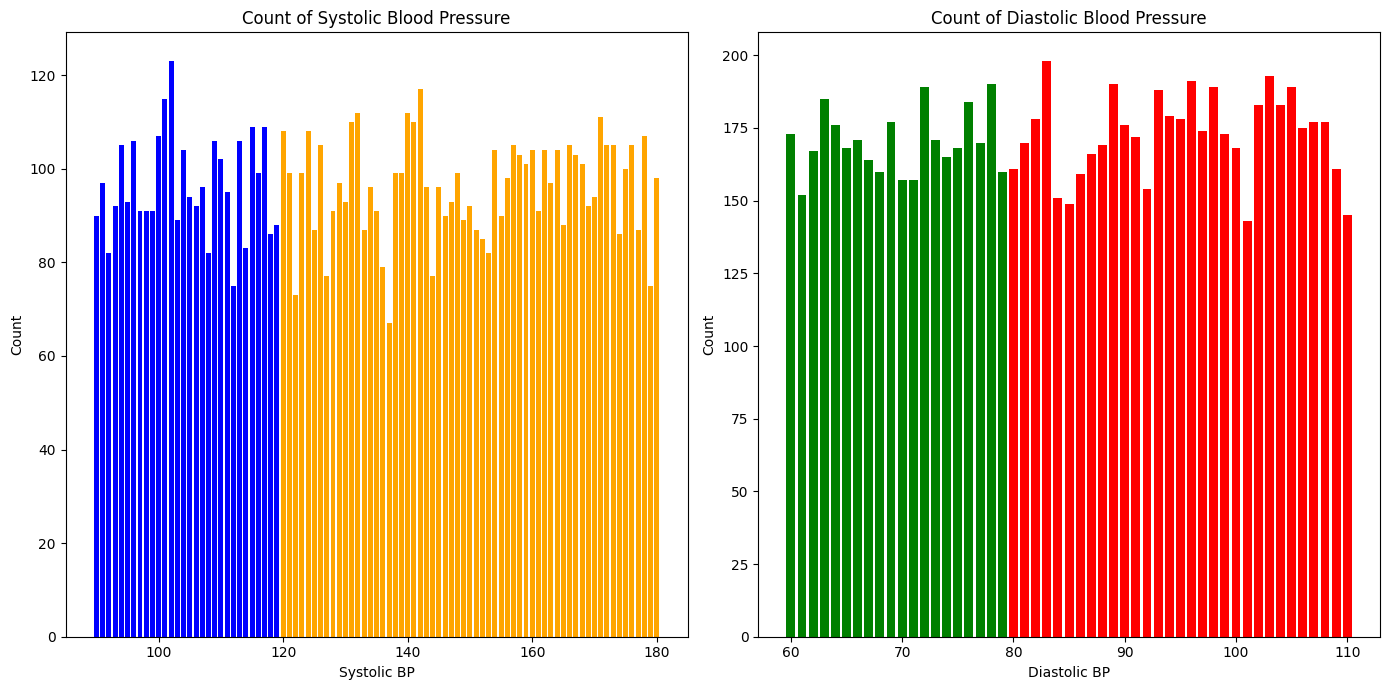

In [145]:
# Hypothesis 3(Blood Pressure)[Aditya_rawat]
# EDA1(Using bar graph)
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

#So we need to get(systolic and diastolic bp) so we go to data cleaning step and create step 10
# Count occurrences for Systolic BP and Diastolic BP
systolic_counts = data['Systolic BP'].value_counts()
diastolic_counts = data['Diastolic BP'].value_counts()

# Set up the figure size
plt.figure(figsize=(14, 7))

# Create a subplot for Systolic BP
plt.subplot(1, 2, 1)
colors = ['blue' if bp < 120 else 'orange' for bp in systolic_counts.index]
plt.bar(systolic_counts.index, systolic_counts.values, color=colors)
plt.xlabel('Systolic BP')
plt.ylabel('Count')
plt.title('Count of Systolic Blood Pressure')

# Create a subplot for Diastolic BP
plt.subplot(1, 2, 2)
colors = ['green' if bp < 80 else 'red' for bp in diastolic_counts.index]
plt.bar(diastolic_counts.index, diastolic_counts.values, color=colors)
plt.xlabel('Diastolic BP')
plt.ylabel('Count')
plt.title('Count of Diastolic Blood Pressure')

# Show the plot
plt.tight_layout()  # Adjust layout for better fitting
plt.show()

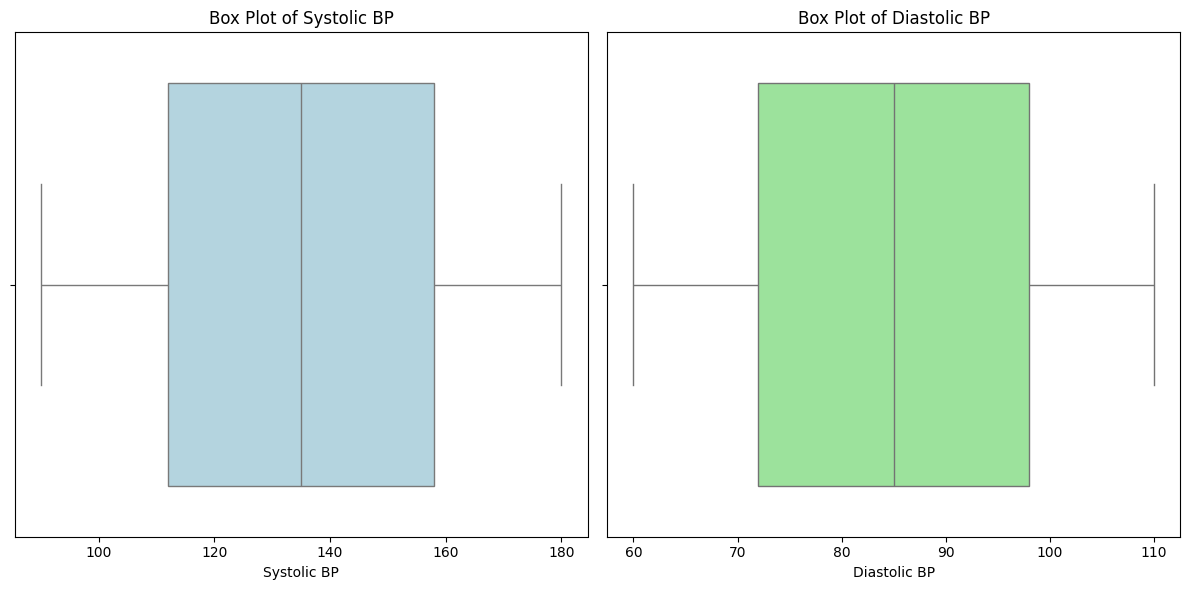

In [146]:
# Hypothesis 3(Blood Pressure)[Aditya_rawat]
# EDA2(Using box plot-for identifying if any outliers are there)
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Convert relevant columns to numeric, coercing errors to NaN
data['Systolic BP'] = pd.to_numeric(data['Systolic BP'], errors='coerce')
data['Diastolic BP'] = pd.to_numeric(data['Diastolic BP'], errors='coerce')

# Drop rows with NaN values in relevant columns
data.dropna(subset=['Systolic BP', 'Diastolic BP'], inplace=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Box plot for Systolic BP
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Systolic BP'], color='lightblue')
plt.title('Box Plot of Systolic BP')
plt.xlabel('Systolic BP')

# Box plot for Diastolic BP
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Diastolic BP'], color='lightgreen')
plt.title('Box Plot of Diastolic BP')
plt.xlabel('Diastolic BP')

# Adjust layout for better fitting
plt.tight_layout()
plt.show()

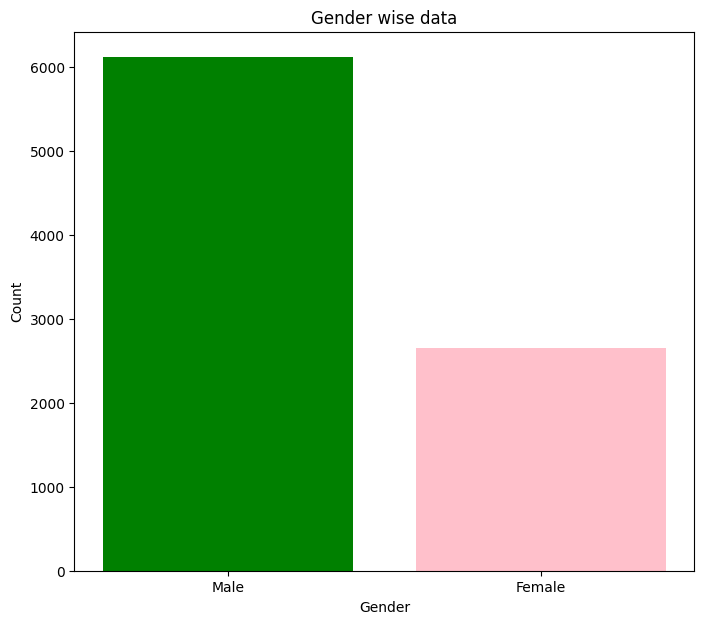

In [147]:
# Hypothesis 4(risk of disease by Gender)[Aditya_rawat]
#EDA3(bar plot for getting gender wise data)
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Create a DataFrame with the 'Gender' column
df_data = data[['Gender']]

# Count the occurrences of each gender
Hyp_num = df_data['Gender'].value_counts()

# Set up the figure size
plt.figure(figsize=(8, 7))

#color to differentiate gender
colors = ['green' if gender == 'Male' else 'pink' for gender in Hyp_num.index]
# Create a bar plot using the counts
plt.bar(Hyp_num.index, Hyp_num.values,color=colors)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender wise data')

# Show the plot
plt.show()

   Gender  Systolic BP  Diastolic BP
0  Female   135.317119     85.206259
1    Male   134.970872     85.134348


<Figure size 1200x600 with 0 Axes>

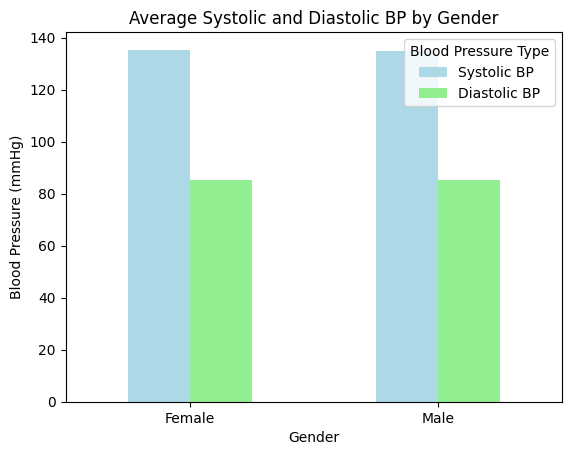

In [148]:
# Hypothesis 4(risk of disease by Gender)[Aditya_rawat]
#EDA4(grouped analyses between Hypothesis 3 & 4)
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Convert relevant columns to numeric, coercing errors to NaN
data['Systolic BP'] = pd.to_numeric(data['Systolic BP'], errors='coerce')
data['Diastolic BP'] = pd.to_numeric(data['Diastolic BP'], errors='coerce')

# Drop rows with NaN values in relevant columns
data.dropna(subset=['Systolic BP', 'Diastolic BP'], inplace=True)

# Group by Gender and calculate mean BP values
grouped_bp = data.groupby('Gender')[['Systolic BP', 'Diastolic BP']].mean().reset_index()

# Print the grouped data
print(grouped_bp)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Bar plot for average Systolic and Diastolic BP by Gender
grouped_bp.set_index('Gender').plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Average Systolic and Diastolic BP by Gender')
plt.ylabel('Blood Pressure (mmHg)')
plt.xticks(rotation=0)
plt.legend(title='Blood Pressure Type', labels=['Systolic BP', 'Diastolic BP'])
plt.show()

In [149]:
#Hypothesis 3 & 4 grouped EDA(Aditya_rawat)

import os
print(os.getcwd())

C:\Users\lenovo
